**Approach 1: work with NVD data feeds:**

https://nvd.nist.gov/vuln/data-feeds#JSON_FEED

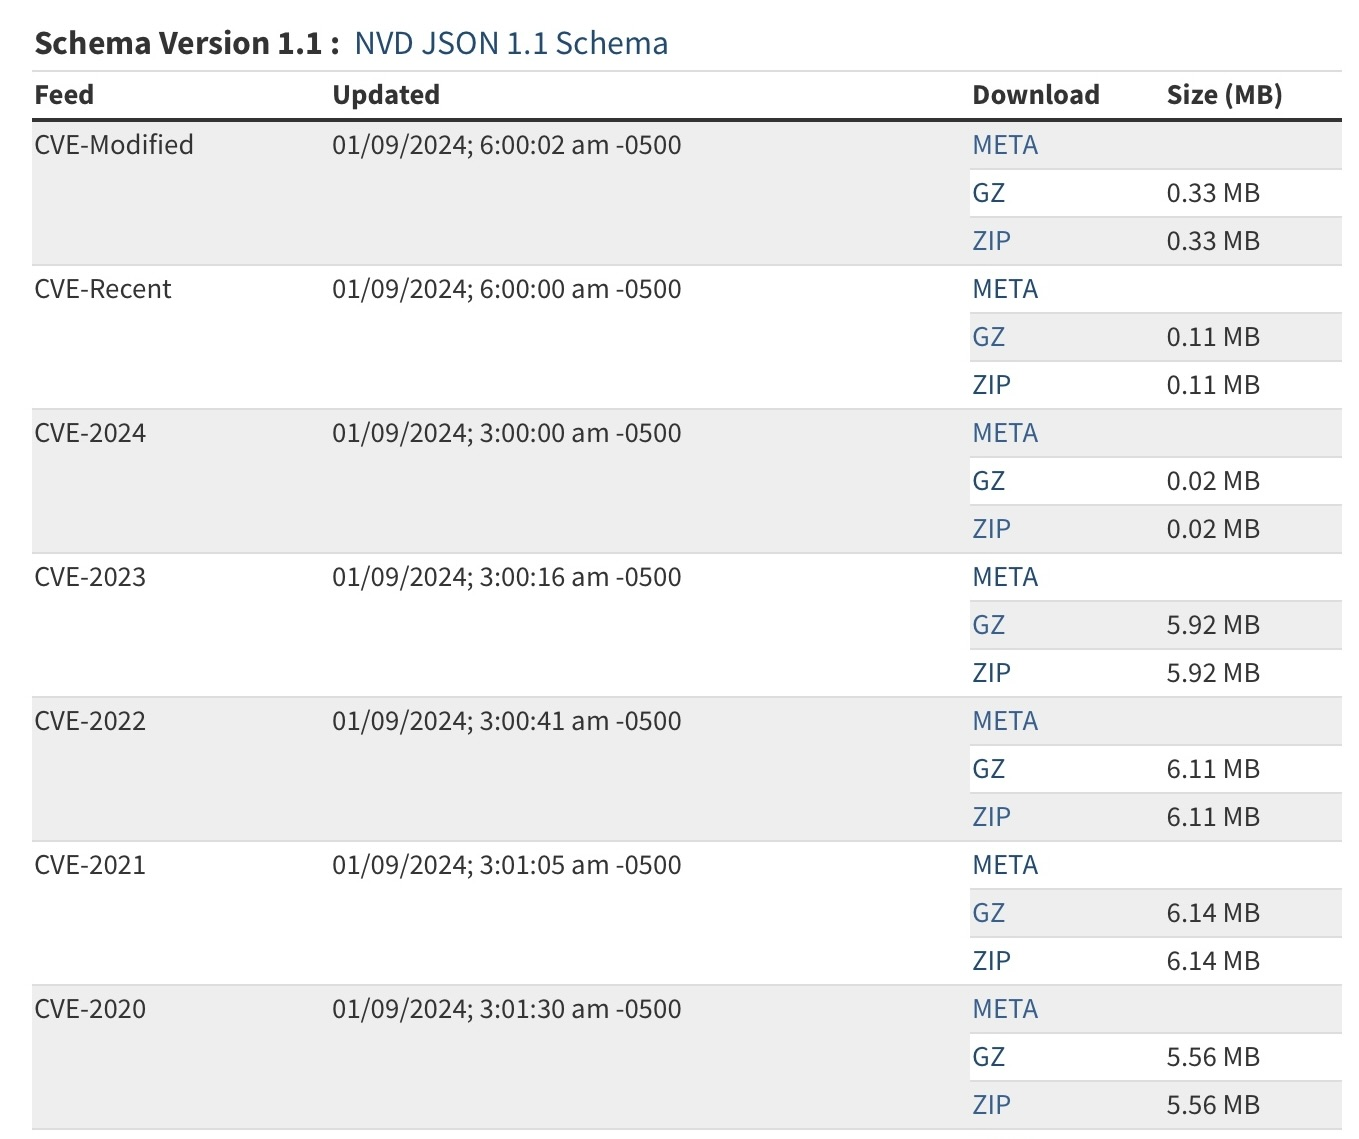

Let's work with CVE-2024 during this tutorial, because we actually don't need a lot of data. We are here to undertand the structure and etc.

Link: https://nvd.nist.gov/feeds/json/cve/1.1/nvdcve-1.1-2024.json.zip

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving nvdcve-1.1-2024.json to nvdcve-1.1-2024.json


Let's investigate this file.

In [ ]:
import json

json_file = open('nvdcve-1.1-2024.json')
vulns_json = json.load(json_file)

vulns_str = json.dumps(vulns_json, indent=4)
print(vulns_str)

{
    "CVE_data_type": "CVE",
    "CVE_data_format": "MITRE",
    "CVE_data_version": "4.0",
    "CVE_data_numberOfCVEs": "135",
    "CVE_data_timestamp": "2024-01-09T08:00Z",
    "CVE_Items": [
        {
            "cve": {
                "data_type": "CVE",
                "data_format": "MITRE",
                "data_version": "4.0",
                "CVE_data_meta": {
                    "ID": "CVE-2024-0069",
                    "ASSIGNER": "security@hypr.com"
                },
                "problemtype": {
                    "problemtype_data": [
                        {
                            "description": []
                        }
                    ]
                },
                "references": {
                    "reference_data": []
                },
                "description": {
                    "description_data": [
                        {
                            "lang": "en",
                            "value": "Rejected reason: This C

Let's parse this JSON.

In [ ]:
for key in vulns_json:
  print(key)

CVE_data_type
CVE_data_format
CVE_data_version
CVE_data_numberOfCVEs
CVE_data_timestamp
CVE_Items


In [ ]:
for item in vulns_json['CVE_Items']:
  print(item)
  break

{'cve': {'data_type': 'CVE', 'data_format': 'MITRE', 'data_version': '4.0', 'CVE_data_meta': {'ID': 'CVE-2024-0069', 'ASSIGNER': 'security@hypr.com'}, 'problemtype': {'problemtype_data': [{'description': []}]}, 'references': {'reference_data': []}, 'description': {'description_data': [{'lang': 'en', 'value': 'Rejected reason: This CVE ID was unused by the CNA.'}]}}, 'configurations': {'CVE_data_version': '4.0', 'nodes': []}, 'impact': {}, 'publishedDate': '2023-11-28T00:15Z', 'lastModifiedDate': '2023-11-28T00:15Z'}


In [ ]:
for item in vulns_json['CVE_Items']:
  for key in item:
    sub_item = item[key]
    if type(sub_item) == dict:
      print(f'{key}:')
      for key in sub_item:
          print(f'- {key}: {sub_item[key]}')
      print()
    else:
      print(f'{key}: {item[key]}')
  print('\n===============================\n')

cve:
- data_type: CVE
- data_format: MITRE
- data_version: 4.0
- CVE_data_meta: {'ID': 'CVE-2024-0069', 'ASSIGNER': 'security@hypr.com'}
- problemtype: {'problemtype_data': [{'description': []}]}
- references: {'reference_data': []}
- description: {'description_data': [{'lang': 'en', 'value': 'Rejected reason: This CVE ID was unused by the CNA.'}]}

configurations:
- CVE_data_version: 4.0
- nodes: []

impact:

publishedDate: 2023-11-28T00:15Z
lastModifiedDate: 2023-11-28T00:15Z


cve:
- data_type: CVE
- data_format: MITRE
- data_version: 4.0
- CVE_data_meta: {'ID': 'CVE-2024-0070', 'ASSIGNER': 'security@hypr.com'}
- problemtype: {'problemtype_data': [{'description': []}]}
- references: {'reference_data': []}
- description: {'description_data': [{'lang': 'en', 'value': 'Rejected reason: This CVE ID was unused by the CNA.'}]}

configurations:
- CVE_data_version: 4.0
- nodes: []

impact:

publishedDate: 2023-11-28T00:15Z
lastModifiedDate: 2023-11-28T00:15Z


cve:
- data_type: CVE
- data_f

Note that we can investigate JSON file structure manually, or check the JSON schema: https://csrc.nist.gov/schema/nvd/feed/1.1/nvd_cve_feed_json_1.1.schema.

**Let's discuss:** how to build a database schema that can store such data.

**Approach 2: work with API of NVD.**

Guide: https://nvd.nist.gov/developers/vulnerabilities

In [ ]:
import requests

api_url = "https://services.nvd.nist.gov/rest/json/cves/2.0/?resultsPerPage=20&startIndex=0"
response = requests.get(api_url)

vulns_json = response.json()
vulns_str = json.dumps(vulns_json, indent=4)
print(vulns_str)

{
    "resultsPerPage": 20,
    "startIndex": 0,
    "totalResults": 235267,
    "format": "NVD_CVE",
    "version": "2.0",
    "timestamp": "2024-01-09T17:39:00.907",
    "vulnerabilities": [
        {
            "cve": {
                "id": "CVE-1999-0095",
                "sourceIdentifier": "cve@mitre.org",
                "published": "1988-10-01T04:00:00.000",
                "lastModified": "2019-06-11T20:29:00.263",
                "vulnStatus": "Modified",
                "descriptions": [
                    {
                        "lang": "en",
                        "value": "The debug command in Sendmail is enabled, allowing attackers to execute commands as root."
                    },
                    {
                        "lang": "es",
                        "value": "El comando de depuraci\u00f3n de Sendmail est\u00e1 activado, permitiendo a atacantes ejecutar comandos como root."
                    }
                ],
                "metrics": {
     

**Let's discuss:** how to automize work with API.

In either way, in the end it is possible to build a database that can store vulnerabilities. So we can go to the network representation and attack graph construction. The main challenge here is to check the configuration of each host to understand if it is vulnerable or not.

In [ ]:
def check_expression(expression):
  operator = expression.split('(')[0]
  values_str = expression \
  .replace(operator, '') \
  .replace('(', '').replace(')', '')

  values_arr = values_str.split(',')
  value = bool(int(values_arr[0]))

  if len(values_arr) > 1:
    for index in range(1, len(values_arr)):
      if operator == 'OR':
        value = value or bool(int(values_arr[index]))

      if operator == 'AND':
        value = value and bool(int(values_arr[index]))

  value = str(int(value))

  return value

In [ ]:
import re
import ast

def check_configuration(uris, config):
  config = config \
  .replace('true', '"True"') \
  .replace('false', '"False"')
  value = ''

  while '(' in config:
    print(config)

    while '{' in config:
      result = re.search(r"\{(.*?)\}", config)
      sub_str = config[result.start():result.end()]

      cpe_dict = ast.literal_eval(sub_str)

      if cpe_dict['cpe23Uri'] in uris:
        config = config.replace(sub_str, '1')

      else:
        config = config.replace(sub_str, '0')

      print(config)

    result = re.search(r'\(([^()]+)\)', config)
    expression = config[result.start()-2:result.end()]

    if expression[:2] == 'ND':
      expression = 'A' + expression

    value = check_expression(expression)
    config = config.replace(expression, value)
    value = bool(int(value))

  return value

For example, let's parse one configuration

In [ ]:
uris = ['cpe:2.3:o:qualcomm:ipq8076_firmware:-:::::::*', 'cpe:2.3:h:qualcomm:ipq8076:-:::::::*']
config = 'AND(OR({"cpe23Uri": "cpe:2.3:o:qualcomm:ipq8076_firmware:-:::::::*", "cpe_name": [], "vulnerable": true}),OR({"cpe23Uri": "cpe:2.3:h:qualcomm:ipq8076:-:::::::*", "cpe_name": [], "vulnerable": false}))'

check_configuration(uris, config)

AND(OR({"cpe23Uri": "cpe:2.3:o:qualcomm:ipq8076_firmware:-:::::::*", "cpe_name": [], "vulnerable": "True"}),OR({"cpe23Uri": "cpe:2.3:h:qualcomm:ipq8076:-:::::::*", "cpe_name": [], "vulnerable": "False"}))
AND(OR(1),OR({"cpe23Uri": "cpe:2.3:h:qualcomm:ipq8076:-:::::::*", "cpe_name": [], "vulnerable": "False"}))
AND(OR(1),OR(1))
AND(1,1)


True

In [ ]:
uris = ['cpe:2.3:o:qualcomm:ipq8076_firmware:-:::::::*']
config = 'AND(OR({"cpe23Uri": "cpe:2.3:o:qualcomm:ipq8076_firmware:-:::::::*", "cpe_name": [], "vulnerable": true}),OR({"cpe23Uri": "cpe:2.3:h:qualcomm:ipq8076:-:::::::*", "cpe_name": [], "vulnerable": false}))'

check_configuration(uris, config)

AND(OR({"cpe23Uri": "cpe:2.3:o:qualcomm:ipq8076_firmware:-:::::::*", "cpe_name": [], "vulnerable": "True"}),OR({"cpe23Uri": "cpe:2.3:h:qualcomm:ipq8076:-:::::::*", "cpe_name": [], "vulnerable": "False"}))
AND(OR(1),OR({"cpe23Uri": "cpe:2.3:h:qualcomm:ipq8076:-:::::::*", "cpe_name": [], "vulnerable": "False"}))
AND(OR(1),OR(0))
AND(1,OR(0))
AND(1,0)


False

So, when we have network representation, the attack graph is a model of the network with only those hosts that are available for the intruder.